# Galaxy Kinematics, Scaling Relations Using MaNGA Data 

**This activity explores ways of interfacing with the MaNGA database, retrieving and visualizing data about the kinematics galaxies in the Universe. This notebook was developed and tested in the [SciServer Compute](www.sciserver.org) platform, in a "Marvin" Container" with the "manga" data volume attached, but may work elsewhere.**  

This tutorial developed by Karen Masters for ASTR352 at Haverford College, borrows heavilly from a variety of other sources, including: 

* [Basics of Marvin](https://sdss-marvin.readthedocs.io/en/stable/tutorials/notebooks/Basics_of_Marvin.html)
* [MaNGA Tutorials](https://www.sdss4.org/dr17/manga/manga-tutorials/#MaNGATutorials)
* [Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools) 
* [MaNGA DAP ReadTheDocs](https://sdss-mangadap.readthedocs.io/)
* [Marvin Lean Tutorial](https://sdss-marvin.readthedocs.io/en/stable/tutorials/lean-tutorial.html)
* [Linear Regression Tutorial](https://prappleizer.github.io/#tutorials) from the free online textbook [Python for Astronomers](https://prappleizer.github.io/index.html) 

As with all Jupyter Notebook tutorials, the procedure you should follow is to run each cell for yourself. You will see places below where you are asked to experiment with adding code, or copying lines of code and changing numbers (and excellent example of coding in practice). 

There are also places where you are asked to edit the Markdown (click on the cell to edit it) to answer various questions. 

For this Notebook please download as a PDF to turn the entire thing in on Moodle. 


## What is MaNGA? 

First we need to understand MaNGA and Marvin, which are data/tools we will use to explore galaxy dynamics. 

1. Check out [Marvin Web](https://dr17.sdss.org/marvin/) and use Image Roulette to pick a galaxy you like (there isn't a correct answer). Click on the galaxy image to visit it's page. Make sure to try to turn on ``Map/Spec View`` for your galaxy. 

2. Which galaxy did you pick and why? Put a screengrab from it's MarvinWeb Page here: 

[[YOUR ANSWER HERE - MAKE THIS A LINK TO YOUR GALAXY]]

My Choice is [8449-9102](https://dr17.sdss.org/marvin/galaxy/8449-9102/) mostly because it's a spiral, also because it has an asteroid moving through the SDSS image (long gone by the time the MaNGA data were taken).

[[YOUR SCREENGRAB HERE]] (you can literally just drag it into the window in Sciserver. 



Also visit the "Galaxy Properties" tab and put a screengrab of that here. You can Zoom into where the points are in the plot by dragging a blue box over the plot area. 

[[YOUR ANSWER HERE]]

But still what is MaNGA? There is a lot of information in [MaNGA Tutorials](https://www.sdss4.org/dr17/manga/manga-tutorials/#MaNGATutorials) on the web, so please read through:  

 * [What is IFU Spectroscopy?](https://www.sdss4.org/dr17/manga/manga-tutorials/what-is-ifu-spectroscopy/)
 * [Introduction to MaNGA](https://www.sdss4.org/surveys/manga/)
    
3. Make a list of 3-5 new terms from these pages (or if they aren't new to you, write a summary of what they mean). The [MaNGA Quick Reference to Terminology](https://www.sdss4.org/dr17/manga/getting-started/#Quickreferencetoterminology) page may be helpful. 

[[YOUR ANSWER HERE]]


3(ii). Can you decode the plate-ifu names of MaNGA galaxies? What does the first number describe. What about the second number? Can you tell which size bundle your chosen galaxy from above was observed through? The [MaNGA Quick Reference to Terminology](https://www.sdss4.org/dr17/manga/getting-started/#Quickreferencetoterminology) page may be helpful. 

[[YOUR ANSWER HERE]]


## MaNGA Map Files

As hopepfully you know by now, MaNGA raw data are spectra, which are combined and gridded into spectral cubes through the Data Reduction Pipeline (DRP). We actually going to use MaNGA Maps files, which are maps of quantities derived from the MaNGA IFU data (like emission line fluxes, Doppler shifts of emission lines and other things). These come from something called the "Data Analysis Pipeline" (DAP). In the cells below work through the

[Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools) 

4. Copy the code from that tutorial into cells below and run it, but please use the galaxy you selected above, rather than the example in the tutorial. 

Stop when you reach the section entitled "Extract a binned spectrum and its model fit" (i.e. don't do that section). 



First do the import statements. Sometimes running these twice removes errors in Sciserver (I don't know why)

Now take another look at the image of your galaxy

Now load the map file for your galaxy and take a look at the data model

That should be a lot! Comment out the ```maps.datamodel``` line and re-run the cell before you submit this notebook. 

5. Pick one of the "properties" copy it's name below and write an explanation of what it is. I think this "Data Model" explains them better than the link (which was broken when I wrote this, but may be fixed by now). You may need to do some reading and following of links to find what you need. Extension (optional extra): can you find a published paper which uses this property from MaNGA data? 

https://data.sdss.org/datamodel/files/MANGA_SPECTRO_ANALYSIS/DRPVER/DAPVER/DAPTYPE/PLATE/IFU/manga-MAPS-DAPTYPE.html

[[YOUR ANSWER HERE]]


6. Also explain what a data model is and why it's important to have one for a file of data. 

[[YOUR ANSWER HERE]]
    


### Emission Line Measurements
 
Still following the [Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools) - now make an Halpha map and plot it.  

7. Write a comment about how the Halpha map compares to the optical image of the galaxy. Can you see the same structures? Why is it (possibly) roughly hexagonal in overall shape? What's the deal with the grey hatching in the background? 

[[YOUR ANSWER HERE]]



Now make a velocity map of the Halpha line limited to only spaxels with S/N>10. 

8. Explain in your own words what this is. Things to think about: What is Halpha? Why is "6564" in the title? Why does this emission line probe ionized gas? What is the zero point of velocity? 

[[YOUR ANSWER HERE]]



### Stellar Velocity Compared to Ionized Gas Velocity

This isn't in the [Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools) , but you can plot the stellar velocity using 

```star_vfield = maps.stellar_velocity```

```mask = ha.mask | mask_snr10```

then 

```fig, ax = mapplot.plot(dapmap=star_vfield, value=star_vfield.value, mask=mask)```

9. Make a plot of the stellar velocity below, and comment on how it appears similar/to or differs to the ionized gas velocity. 

[[[YOUR ANSWER HERE]]]



### Velocity Dispersion 

Stellar velocities come from fits to the absorption features in the atmospheres of stars. The shift of the peak is what is plotted as the "bulk" velocity of the stars, but the broadening of the line also gives information about the amplitude of random motions there are in the stars in that little region of the galaxy. This is called the velocity dispersion. 

Back to following the [Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools) , plot the stellar velocity dispersion below. Make sure to use the correction for instrumental resolution. 

10. Comment on the stellar velocity dispersion map. How do the amplitudes compare to the stellar (or ionized gas) velocity? Possibly hard question: what is an instrumental resolution correction? What is the spectral resolution of the MaNGA data? 

[[[YOUR ANSWER HERE]]]

 

### Spectral Index Measurements

Some quantities which are measured on the average stellar - or continuum spectra of a galaxy (called spectral indexes) should be corrected for stellar velocity dispersion. This is decribed more in [DAP Documentation](https://sdss-mangadap.readthedocs.io/en/latest/corrections.html#corrections). I suggest plotting Dn4000 rather than HBeta as in the [Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools) (replace ```specindex_hb``` with ```specindex_dn4000``` wherever it appears). Do this in the cell below. 

11. Dn4000 correlates well with the age of the stellar population - where it is high the stars are likely old, and where it's small they are young. Where in your galaxy are the stars/old or young? Do you notice any patterns? 

[[[YOUR ANSWER HERE]]]



## Unique Bins

Finally, we'll plot unique data - meaning the values which are independently measured. This isn't true if you plot data in every spaxel, for various reasons. Spaxels are actually smaller than the spatial resolution of the data (0.5" compared to 2.5") and the data are also often binned to improve the signal-noise ratio. A bin here is a collection of spatially adjacent spaxels. As the [Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools) describes, the MaNGA spaxels are binned in various different ways. Use the code shown in the [Marvin DAP Tools Tutorial](https://www.sdss4.org/dr17/manga/manga-tutorials/marvin-tutorial/marvin-tools)to plot the velocity of unique stellar velocity bins in a scatter plot. **Make sure to use your galaxy, not the example in the tutorial - you have to change the ```plate-ifu=7443-12703``` in the code**

We're going to make the same plot in Marvin to compare. You might want to tweak the color bar in the Marvin plot to better match what you just did (so you can compare colours directly). [Marvin Custom Color-Bar Range](https://sdss-marvin.readthedocs.io/en/latest/tutorials/plotting-tutorial.html#custom-map-colorbar-range-options) tutorial gives examples of how to do that. Change the numbers to work better for your galaxy.  

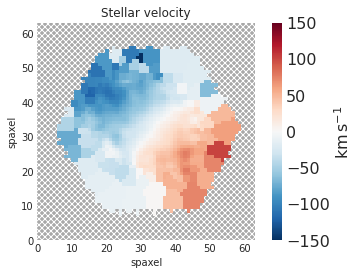

In [95]:
fig, ax = star_vfield.plot(cbrange=[-150, 150])

12. Can you see how the Marvin map deals with binning. Which map do you think is easier to understand? Any other differences you notice? 

[[[YOUR ANSWER HERE]]]



## Selecting Galaxies in Marvin

Now we'll work through the [Marvin Lean Tutorial](https://sdss-marvin.readthedocs.io/en/stable/tutorials/lean-tutorial.html) to learn some of the other functions of Marvin. 

As before you will copy the code here, and make sure to add some Markdown, or comment the code to explain what each step is doing.

These documentation pages may be useful: 
* [Marvin Queries](https://sdss-marvin.readthedocs.io/en/stable/tutorials/notebooks/marvin_queries.html) 
* [BPT Diagrams in Marvin](https://sdss-marvin.readthedocs.io/en/stable/tools/bpt.html)

EXTENSION: 

Now you have Halpha maps of several galaxies use the [MultiPanel Plot Example](https://sdss-marvin.readthedocs.io/en/stable/tutorials/plotting-tutorial.html#multi-panel-map-plot-multiple-galaxies) to add a multi panel plot showing a few together alongside their halpha velocity.


Hint - you can let a list of two plateifus from the query you ran above using ```plateifus = df['plateifu'][:2]
```

## Fitting the Tully-Fisher Relation

We're now going to explore some of the galaxies and data from [Ristea et al. 2024](https://academic.oup.com/mnras/article/527/3/7438/7450469#431384593) who used MaNGA data to explore the stellar mass Tully-Fisher relation. 

First plot an image of the galaxy 9883-12703, which is one of the galaxies used by Ristea et al. (HINT: just grab the code you used to do this earlier in this notebook). 

Now plot the stellar and gas kinematics maps, and two other maps quantites of your choice for the galaxy 9883-12703. Modify this [Multi-panel Map Plot (Single Galaxy)](https://sdss-marvin.readthedocs.io/en/stable/tutorials/plotting-tutorial.html#multi-panel-map-plot-single-galaxy) code to do this. 

For Tully-Fisher we need rotation curves, which are plots of the circular velocity as a function of radius. A quick version of that is actually pretty easy to do in Marvin because each spaxel comes with a ```radius``` value, in units of "effective radius" and deprojected assuming a "thin-disk" (i.e. assuming the galaxy is actually a disc with zero thickness viewed at some angle to the line of sight and finding the radius in the plane of that disc).  

13. Run the below code, and add some appropriate axis titles (edit the bit which says "somthing with units"). You might want to use Latex commands in the titles for nice formatting: see [Rendering math equations using TeX in Matplotlib](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html) if you don't know how, or need a reminder. 

In [111]:
radius=maps.spx_ellcoo_r_re
gas_vfield = maps.emline_gvel_ha_6564
ha=maps.emline_gflux_ha_6564
mask_snr10 = (ha.snr < 10) * ha.pixmask.labels_to_value('DONOTUSE')
mask = ha.mask | mask_snr10

In [ ]:
plt.plot(radius.value[mask==0],halphavel.value[mask==0],'.')
plt.xlabel('Something with units')
plt.ylabel('Something with units')

This probably doesn't look like you expect, that's because one side of the galaxy is moving away from us, and the other is approaching. Never mind we can fix that by plotting the absolute value.

In [ ]:
vcirc = abs(halphavel.value[mask==0])
plt.plot(radius.value[mask==0],vcirc,'.')
plt.xlabel('Something with units')
plt.ylabel('Something with units')

It's still a bit odd though as it shows a range of vaues from close to zero to a max at all points. What's up with that? Any ideas how to fix it? 

[[[PUT YOUR THOUGHTS HERE]]]

HINT:  [SciPy Binned Statistic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html) might be useful. It's a bit tricky to work with, so let me show you how to do the mean values. Is this the best statistic here? Make sure to add your axis labels from above. Get into the habit of **never** making a plot without labels. 

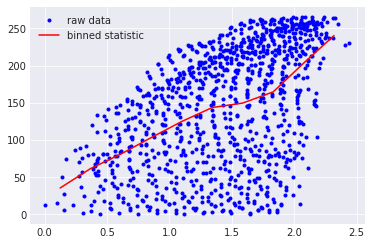

In [115]:
from scipy import stats

binned_vel, bin_edges, binnumber = stats.binned_statistic(radius.value[mask==0],
                vcirc, statistic='mean')
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.plot(radius.value[mask==0],vcirc, 'b.', label='raw data')
plt.plot(bin_centers, binned_vel, 'r', label='binned statistic')
plt.legend()

Copy, and then modify the code above to do something different with the data. 

For this galaxy, you can find the values Ristea et al. measured for the velocity at different radii in the [Supplementary Data](https://academic.oup.com/mnras/article/527/3/7438/7450469#supplementary-data). It's one of the galaxies shown in the README file. They say they measure 

"Vel_G_NRe (N = 1, 1.3, 2): ionised gas rotational velocity at N×𝑅e, from the centred and inclination-corrected rotation curve [km s−1];" 

14. Add these three data points to the plot you have made. How do they compare with your measurement so far. What parts haven't we done? 

In [245]:
paperradius=[] #Fill in these values
papervel = []


## Fitting a Line to Data

Now we're going to just use the data from Ristea et al. and fit our own Tully-Fisher relation to their data (our version of their Figure 3). 

To do this we will work through the [Linear Regression Tutorial](https://prappleizer.github.io/#tutorials) from the free online textbook [Python for Astronomers](https://prappleizer.github.io/index.html) but use the data from Ristea et al. as our example. 

So the first thing to do is to get the Ristea et al. fits table on the same computer as this Notebook (e.g. upload to Sciserver if using Sciserver). Then import it into a pandas dataframe, using astropy...

In [126]:
from astropy.table import Table
dat = Table.read('MaNGA_DR17_Kinematic_Ristea23_v1fits', format='fits')
df = dat.to_pandas()

Now you can do all the things you learned in the last tutorial with this file. Yay! For example: 

In [127]:
df.describe()

,RA,DEC,log_Mstar,log_SFR,Vel_ST_1Re,err_Vel_ST_1Re,Vel_ST_1.3Re,err_Vel_ST_1.3Re,Vel_ST_2Re,err_Vel_ST_2Re,...,Vel_G_1.3Re,err_Vel_G_1.3Re,Vel_G_2Re,err_Vel_G_2Re,Vsig_G_1Re,Vsig_G_1.3Re,Vsig_G_2Re,Sample,Rmax_ST,Rmax_G
count,4215.000000,4215.000000,4215.000000,4215.000000,2683.000000,2683.000000,2211.000000,2211.000000,530.000000,530.000000,...,3047.000000,3047.000000,1019.000000,1019.000000,3.430000e+03,3047.000000,1019.000000,4215.000000,2689.000000,3430.000000
mean,183.003134,28.444095,10.397897,-0.455838,153.706179,19.422458,167.347745,21.235919,176.714550,25.231502,...,163.069427,11.037370,175.314716,11.292862,1.754429e+00,2.021641,2.258514,2.474021,1.384641,1.474461
std,76.247429,18.071347,0.648660,0.772142,60.847614,13.503262,62.284140,13.602468,56.550937,13.721024,...,75.338318,6.826275,66.335105,5.966135,8.537545e-01,0.935755,0.878977,1.019379,0.324734,0.353866
min,0.008808,-9.302426,8.311000,-3.341000,22.235921,1.481081,18.529519,1.618280,28.260901,3.608339,...,31.611598,7.000000,44.140662,7.000000,3.498140e-08,0.071193,0.196093,1.000000,1.000000,1.000000
25%,129.575530,14.302337,9.929000,-0.857500,109.931653,10.388668,122.850060,11.692165,137.126743,15.465548,...,105.682820,7.958917,125.296019,8.300557,1.100537e+00,1.324439,1.659018,2.000000,1.300000,1.300000
50%,193.855953,29.730240,10.475000,-0.332000,149.221053,14.795975,165.344211,16.837213,177.027561,21.116852,...,147.294116,9.036829,164.012096,9.608187,1.687689e+00,1.959465,2.236492,2.000000,1.300000,1.300000
75%,241.004600,43.796510,10.900000,0.089500,192.205449,23.999187,207.085632,26.667221,212.973943,31.934439,...,207.417699,11.159183,216.536433,12.075678,2.266262e+00,2.603519,2.809149,3.000000,1.300000,2.000000
max,359.175241,64.575924,11.884000,1.484000,422.727360,101.221194,421.255184,98.648628,412.677238,79.965281,...,554.723592,93.139407,492.582892,71.359186,5.733099e+00,5.840578,5.251600,4.000000,2.000000,2.000000


15. Now make y be the log of one of the measured velocities, and x be the stellar mass (log stellar mass) and do the rest of the [Linear Regression Tutorial](https://prappleizer.github.io/#tutorials). This is a classic - fitting a straight line to a log-log plot in astronomy. 

You're going to find it doesn't work unless you remove NaN values. One way to do that is using [Pandas Dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function. E.g. the below removes all rows with NaN ("not a number") values in stellar mass or the velocity in the gas measured at 1Re. 

```dfclean=df.dropna(subset=['log_Mstar', 'Vel_G_1Re'])```

It's usually good to check what that does. ```df.size``` will tell you how many rows you lose. 

Note that there is (Mar 2024) an error in the the code for the quadratic fit. What is below is different from the tutorial. 

In [ ]:
dfclean=df.dropna(subset=['log_Mstar', 'Vel_G_1Re'])
dfclean.size

In [ ]:
df.size

In [ ]:
x = dfclean.log_Mstar
y = np.log10(dfclean.Vel_G_1Re)

plt.plot(x,y,'b+',label='data')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Data to Fit')

In [151]:
def linear_fit(x_data, y_data):
    N = len(x_data)
    array_1 = np.array([[N, np.sum(x_data)],[np.sum(x_data),np.sum(x_data**2)]])
    array_3 = np.array([[np.sum(y_data)],[np.sum(y_data*x_data)]])
    array_1_inv = np.linalg.inv(array_1)
    out_arr = np.dot(array_1_inv,array_3)
    intercept, slope = out_arr[0], out_arr[1]
    return slope, intercept

In [ ]:
linear_fit(x,y)

In [ ]:
def plot_fit(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    plt.plot(x,y,'b+',label='data')
    plt.plot(x,fit_line,'r',label='Linear Fit')
    plt.legend()
    plt.xlabel(r'$\log(M/M_\odot)$')
    plt.ylabel(r'$\log V_{\rm gas}$ at 1 R$_e$')
    plt.title('Ionized gas Tully-Fisher Relation')
    plt.show()
    

plot_fit(x,y)

In [155]:
def return_residuals(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    residuals = y - fit_line
    return residuals, np.sum(residuals)

In [ ]:
residuals, sum_residuals = return_residuals(x,y)
print(sum_residuals)

In [ ]:
def quadratic_fit(x,y):
    fit_coefficients = np.polyfit(x,y,2)
    a0, a1, a2 = fit_coefficients[0], fit_coefficients[1], fit_coefficients[2]
    return a0, a1, a2
def plot_quadratic_fit(x,y):
    a0, a1, a2 = quadratic_fit(x,y)
    xplot=np.arange(np.min(x),np.max(x),0.1)
    fit_line = a0*xplot**2 + xplot*a1 + a2
    plt.plot(x,y,'b+',label='data')
    plt.plot(xplot,fit_line,'r',label='quadratic fit')
    plt.legend()
    plt.show()
    
plot_quadratic_fit(x,y)
print(quadratic_fit(x,y))

16. How does your linear line fit compare to the relation published in the paper? Make sure to label your plot axes better than the "x values" and "y values" in the tutorial! 

[[[YOUR ANSWERS HERE]]]

My fit equation is: $\log V_{\rm gas}$ at 1 R$_e$ = AAA $\log (M/M_\odot)$ - BBB


17. Bonus - remake the plot showing both your fit, and the paper fit. 

As you will have noticed, things aren't totally identical, although they are similar. Usually we don't write our own linear fitting code. The paper used [EMCEE sampler PYTHON package](https://emcee.readthedocs.io/en/stable/tutorials/line/) (Foreman-Mackey et al. 2013) and the orthogonal linear regression implemented by the [HyperFit](https://hyperfit.readthedocs.io/en/latest/tutorial.html#) package (Robotham & Obreschkow 2015). 

If you follow the links you will see both of these modules come with tutorials (which may be useful in the future, or you can look at if you found the rest of this notebook really easy - consider them optional extensions). Turns out some astronomers get really into line fitting codes, which is super useful for the rest of us. 

Both Scipy and Numpy also have line fitting. [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) and [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Try out both of these (with a straight line - you may have noticed the tutorial used np.polyfit for the quadratic!) and compare to your line fit. 

In [ ]:
#Try Scipy and Numpy fitting in some cells here

### How good is the correlation? 

A commonly used metric of how well two variables correlate is the [Pearson's Correlstion Coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html). We can use the ```Scipy.stats.pearsonr``` to get that for the Tully-Fisher relation.

In [ ]:
res = stats.pearsonr(x, y)
res

Add a comment on the correlation here. 

[[[YOUR ANSWER HERE]]]

## Histograms of MaNGA Gas Velocities Compared to HI Global Profiles

The last thing to explore in this tutorial is how histograms of velocities measured my MaNGA compare to the HI global profiles measured by HI-MaNGA. Historically the Tully-Fisher relation was actually measured using line widths from HI measurements, which probe the dynamics in the outer parts of galaxies better (because atomic hydrogen usually extends out way beyond where we can detect light from stars or ionized gas). 

We'll go back to a different example galaxy from Ristea et al. sample which has a nice regular rotation, and will turn out to have a GBT HI observation too (10214-12701).

Marvin actually has an integrated [histogram plot](https://sdss-marvin.readthedocs.io/en/stable/tools/utils/plot-hist.html) (based on the Matplotlib ```hist()``` function), but I usually just use matplotlib histograms. 

First re-plot your four panel figure for this galaxy so you remember what it looks like (copy your code from above). 

In [ ]:
maps = Maps('10214-12701')



Now make a histogram of the halphavel values. This is stored as a 2D array, and has odd values unless a mask is applied, so first apply a S/N mask, then unravel it. 

In [232]:
mask_snr10 = (halpha.snr < 10) * halpha.pixmask.labels_to_value('DONOTUSE')
mask = halpha.mask | mask_snr10

vel=np.array(halphavel.value[mask==0])
vel=vel.flatten()
vel

array([ 134.4595  ,  135.94337 ,  149.85861 , ..., -117.393486,
       -114.71733 , -104.21476 ])

And this is some Marvin code to make a histogram. 

In [ ]:
from marvin.utils.plot.scatter import hist

# use a Marvin DataModel object from DR17
from marvin.utils.datamodel.dap import datamodel
dm = datamodel['DR17']
# grab the Ha emission line flux property
prop = dm['emline_gvel_ha']

# make the histogram using the Marvin Property to label
out = hist(vel, xlabel=prop, bins=20)

Now do the same thing using matplotlib histogram function. 

### Comparing Two Histogram

Something we often want to do is compare two histograms of properties and see how similar they are. Let's do that for the gas and stellar velcities for our galaxy. We already have what we need for the gas vel. Let's make an identical list of stellar vels. 

In [239]:
STvel=np.array(stvel.value[mask==0])
STvel=STvel.flatten()
prop2=dm['Stellar_vel']

Now let's make a histogram showing both of those with identical bins. 

In [ ]:
plt.hist(vel,range=[-150,150],bins=20,label=prop,alpha=1)
plt.hist(STvel,range=[-150,150],bins=20,label=prop2,alpha=0.5)
plt.xtitle=('Stellar or gas velocity')
plt.legend()

These look pretty different to me, but lets put some statistics on that, using the [Kolmogorov-Smirnov two sample test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test#Two-sample_Kolmogorov%E2%80%93Smirnov_test) (yes that's a Wikipedia link, but I bet it's accurate and detailed and Scipy doesn't explain it much), conveniently available as ```scipy.stats.ks_2samp```

Small p-values mean the distributions are unlikely to be the same, typically ```pvalue<0.05``` is used to rule that out at 95% confidence (for the sample size you have). 

In [ ]:
stats.ks_2samp(vel, STvel)

Q. What do you conclude from your KS test? 

[[[YOUR ANSWER HERE]]]

## Galaxy Meta Data 

As described in the [Basics of Marvin](https://sdss-marvin.readthedocs.io/en/stable/tutorials/notebooks/Basics_of_Marvin.html) tutorial, each galaxy also comes with a bunch of associated meta data, meaning things which are a single value per galaxy, not spaxel-based arrays. For example

* [NASA Sloan Atlas (NSA)](https://www.sdss4.org/dr17/manga/manga-target-selection/nsa/) - a catalogue of values mostly based on the original SDSS imaging and single fiber spectroscopy which was used to select the MaNGA sample
* [DRAPall](https://www.sdss4.org/dr17/manga/manga-data/catalogs/#DRPALLFile) - a summary file from the Data Reduction Pipeline, with data about observing conditions (also contains some values from the NSA)
* [DAPall](https://www.sdss4.org/dr17/manga/manga-data/catalogs/#DAPALLFile) - a summary file from the Data Analysis Pipeline, with some global measurements based on emission line, and spectral index measurements. 
* [Value-Added-Catalogues (VACS)](https://www.sdss4.org/dr17/data_access/value-added-catalogs) - ancillary (extra) data about the galaxies provided by various teams associaed with MaNGA. E.g. HI-MaNGA (which we work on at Haverford) is one of these, for HI followup of the MaNGA sample. 

In [195]:
#Look at NASA Sloan Atlas (NSA) values associated with our galaxy
#maps.nsa # PLEASE COMMENT THIS LINE AND RE-RUN BEFORE SUBMITTING

In [197]:
#The DAP provides a summary file. 
#maps.dapall # PLEASE COMMENT THIS LINE AND RE-RUN BEFORE SUBMITTING

Overplot on one of your histograms vertical lines at the values of these DAP summary quantities. 
* 'ha_gvel_lo'
* 'ha_gvel_hi'
* 'ha_gvel_lo_clip'
* 'ha_gvel_hi_clip'

I provide one example to get your started

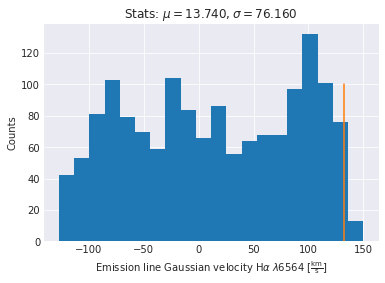

In [222]:
a = maps.dapall['ha_gvel_hi']
out = hist(vel, xlabel=prop, bins=20)
plt.plot([a,a],[0,100])

16. What did I ask you to plot? You probably need to visit some DAP documentation to figure it out. 

[[[YOUR ANSWER HERE]]]

Now Value Added Catalogue (VACs). Our Haverford Galaxy Group HI observations are accessible in Marvin! At least the publicly released ones. First we figure out which VACs are available for this galaxy. 

In [ ]:
vacs = maps.vacs
vacs

Yay it has a HI data entry. Also Galaxy Zoo, GZ3D, GEMA (environment) and Firefly (which for the group - is like Pipe3D, but I think Pipe3D is more reliable). Let's access the HI data. This is still all in the [Basics of Marvin](https://sdss-marvin.readthedocs.io/en/stable/tutorials/notebooks/Basics_of_Marvin.html) tutorial, but you have to use "HI" not "mangahi". 

In [ ]:
# access the mangahi vac
hi = vacs.HI
print(hi)
print('data type:', type(hi))

# access any HI data available for 8485-1901
hi.data


So this galaxy was observed at GBT in 2019 ('AGBT19A_127_45' appears in that data). That's why I picked it. You can actually look at the spectrum in Marvin like this (see [VACs in Marvin](https://sdss-marvin.readthedocs.io/en/stable/tools/vacs.html): 

In [ ]:
hi.plot_spectrum()

17. This is effectively a HI mass weighted histogram of the HI velocities observed in this galaxy. Compare this to your histogram of halpha gas velocities, and comment on how it is similar, and how it differs. 

[[[YOUR ANSWER HERE]]

That's all I prepared. Optional extension ideas I haven't tried: 
* Plot the HI width against the velocities measured by Ristea. You want ```hi['WM50']``` for that, and you will have to get it for all the galaxies in the Ristea sample. How well do they correlated? Good luck! 
* Make a HI Tully-Fisher relation. You can do that from the [```mangaHIall.fits``` file](https://data.sdss.org/sas/dr17/env/MANGA_HI/v2_0_1/), or accessing the HI values through Marvin. Notice the HI data also has a ```hi['LOGMSTARS']``` column, or you can use the HI mass rather than stellar mass. 